*Credits: Applied Data Analysis (ADA) course at EPFL (https://dlab.epfl.ch/teaching/fall2020/cs401/)*

## Density based clustering: DBSCAN

K-Means is an intuitive and effective algorithm, but what happens when the data has a complex shape?

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

Let's generate some synthetic data that resemble two half-moons.

Text(0, 0.5, 'Feature 2')

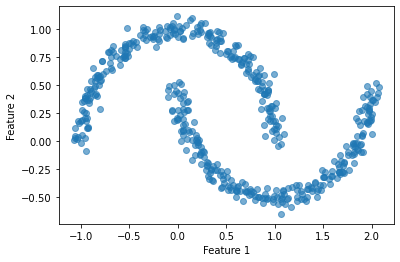

In [2]:
# Create 500 random points with 2-moons shape
X_moons, _ = make_moons(500, noise=0.05, random_state=0)

plt.scatter(X_moons[:,0], X_moons[:,1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

We can visually see that there are two groups. Let's assign the labels with K-Means!

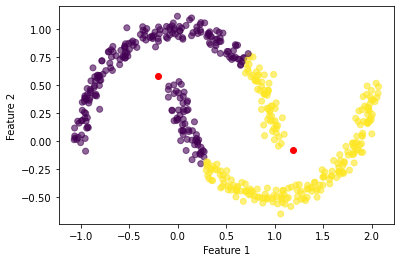

In [3]:
kmean = KMeans(n_clusters=2, random_state=0).fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=kmean.labels_, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the centroids
for c in kmean.cluster_centers_:
    plt.scatter(c[0], c[1], marker="o", color="red")

Let's cluster the data with [DBSCAN](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556) by variating the `eps` value (maximum distance between two samples for one to be considered as in the neighborhood of the other) in the range between 0.05 and 0.15. For further information, check out the library documentation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

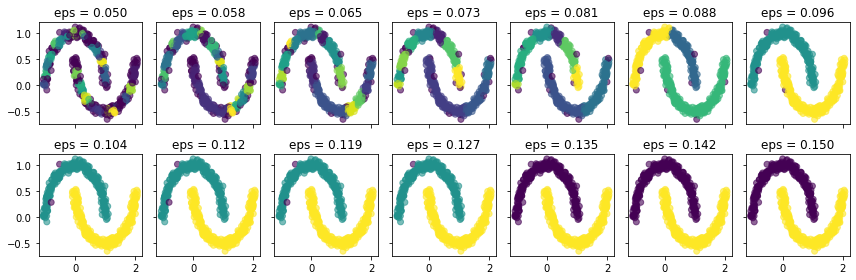

In [4]:
# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14)

# Compute number of row and columns
COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_moons)
    ax.scatter(X_moons[:,0], X_moons[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

We observe that a density-based algorithm like DBSCAN could be more appropriate to model the data than K-Means for complex shapes.